Imported all libraries needed

In [22]:
import pandas as pd
import datetime as dt
import time
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

Imported the csv file called city_date

In [23]:
data=pd.read_csv("city_data.csv",sep="|",header=1)
data.head(86)

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,309.0,2023-06-08 00:00:00


`QUESTION 1`

We check to see how many missing values are there in the dataset

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In the column ("Average Price Groceries ) there was only 6 rows with a entries and the rest of the the row were null.
In the rest of the columns there was only a few missing values, so we decided to fill the missing values with "Unkown".

In [25]:
for col in data.columns:
  data[col]=data[col].fillna("Unknown")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               86 non-null     object 
 2   Population                       86 non-null     int64  
 3   Working Age Population           86 non-null     object 
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                86 non-null     object 
 6   GDP per Capita                   86 non-null     object 
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            86 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

We check to see how many duplicate values there are in the data set

In [27]:
duplicate_indexes=data.index[data["City"].duplicated(keep=False)]
data.loc[duplicate_indexes]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,Unknown,2023-06-29 00:00:00
16,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,Unknown,2023-06-29 00:00:00
32,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,Unknown,2023-11-27 00:00:00
33,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,Unknown,2023-11-27 00:00:00


As we can see that the city Berlin(Germany) and Malaga(Spain) appared twice in the data set.

In [28]:
data=data.drop([16,33])
data.iloc[15:34,:]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,Unknown,2023-06-29 00:00:00
17,"Hamburg, Germany",461.0,3315036,2181857.0,21.5,3.2,61058.0,0,"German, English, Turkish",3500,1100,2100,Unknown,2024-07-10 00:00:00
18,"Munich, Germany",529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,Unknown,2023-03-16 00:00:00
19,"Cologne, Germany",1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,230.0,2024-11-23 00:00:00
20,"Frankfurt am Main, Germany",631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,Unknown,2023-02-04 00:00:00
21,"Stuttgart, Germany",763.0,2787449,1843613.0,21.2,2.5,67644.0,3,"German, Turkish",3300,1300,2300,Unknown,2024-05-19 00:00:00
22,"Leipzig, Germany",263.0,1043613,662617.0,21.4,4.3,41097.0,3,German,2800,800,1600,Unknown,2023-07-30 00:00:00
23,"Dresden, Germany",231.0,1343213,818095.0,23.0,3.8,39767.0,0,German,3050,800,1530,Unknown,2023-08-01 00:00:00
24,"Dusseldorf, Germany",1295.0,1554077,Unknown,21.4,3.3,71238.0,3,Unknown,3200,1100,2050,Unknown,2024-01-15 00:00:00
25,"Hanover, Germany",444.0,1316467,854349.0,21.0,4.0,54827.0,2,German,2800,900,1800,Unknown,2023-10-07 00:00:00


We then procceded to drop the duplicate cities

In [29]:
data=data.reset_index(drop=True)

We then decided to create another dataset with two new columns, one of them being country only and the other being the city only, so we can have a better and easier view of the data set.

In [30]:
data_new=data
data_new.columns=data.columns.str.strip()
data_new["City Only"]=data["City"].str.split(",").str[0].str.strip()
data_new["Country"]=data["City"].str.split(",").str[1].str.strip()
data_new.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City Only,Country
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00,Vienna,Austria
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,Unknown,2023-11-03 00:00:00,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,Unknown,2023-04-22 00:00:00,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,Unknown,2024-08-09 00:00:00,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813,417832.0,24.8,Unknown,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00,Gent,Belgium


We checked to see if any of the countries were written in the city column

In [31]:
repeated_cities=[]
for country in data_new["Country"].value_counts().index:
    for idx in data_new.index:
        if country==data_new["City Only"].loc[idx]:
            repeated_cities.append(idx)

In [32]:
data.loc[repeated_cities]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update,City Only,Country
43,"Greece, Athens",1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,Unknown,2024-07-16 00:00:00,Greece,Athens
58,"Luxembourg, Luxembourg",236.0,610825,424824.0,23.1,5.6,112143.0,2,"Luxembourgish, French, German, English",4200,2100,3300,Unknown,2024-11-29 00:00:00,Luxembourg,Luxembourg
60,"Malta, Malta",1845.0,456490,309610.0,20.2,3.7,44781.0,0,"Maltese, English",1450,1000,1400,Unknown,2024-02-28 00:00:00,Malta,Malta


There wass only one row that was wriiten incorrectly, it was Greece, Athens

In [33]:
data.loc[43, "City"]="Athens, Greece"
data_new.loc[43, "City"]="Athens, Greece"
data_new.loc[43, "City Only"]="Athens"
data_new.loc[43, "Country"]="Greece"
data.loc[43]

City                                    Athens, Greece
Population Density                              1829.0
Population                                     3530371
Working Age Population                       2287174.0
Youth Dependency Ratio                            22.0
Unemployment Rate                                 17.2
GDP per Capita                                 38580.0
Days of very strong heat stress                     17
Main Spoken Languages                   Greek, English
Average Monthly Salary                            1050
Avgerage Rent Price                                600
Average Cost of Living                            1200
Average Price Groceries                        Unknown
Last Data Update                   2024-07-16 00:00:00
City Only                                       Athens
Country                                         Greece
Name: 43, dtype: object

We changed it so it reads Athens, Greece in stead of Greece, Athens

`QUESTION 2`

`2a)`  Which country appears most frequently in the dataset?

In [34]:
max_country_name=data["Country"].value_counts().idxmax()
max_cities_number=data["Country"].value_counts().max()
max_cities_name=data_new[data_new["Country"]==max_country_name]["City Only"].tolist()

print(f"The country that appears more times is {max_country_name}, with {max_cities_number} cities associated: {cities_name}")

NameError: name 'cities_name' is not defined

`2b)`  How many cities are present in total? How many are associated with Greece?

In [ ]:
cities_number=data.shape[0]
greece_cities_number=data["Country"].value_counts()["Greece"]
greece_cities_name=data_new[data_new["Country"]=="Greece"]["City Only"].tolist()
print(f"The total number of cities are {cities_number}.{greece_cities_number} cities are from Greece whcih are: {greece_cities_name}")

The total number of cities is 84.2 cities are from Greece whcih are: ['Athens', 'Thessaloniki']


There are a total of 84 cities.

`2c)` Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

In [ ]:
languages_number=data["Main Spoken Languages"].str.split(',').explode().str.strip().value_counts()
min_count = languages_number.min()
least_spoken = languages_number[languages_number == min_count].index.tolist()
top3 = languages_number.nlargest(4).index.tolist()
print(f"The least spoken languages are {least_spoken}")
print(f"The top ones are {top3}")

The least spoken languages are ['Bengali', 'Scots', 'Scots Gaelic', 'Estonian', 'Spanish;Valencian', 'Luxembourgish', 'Latvian', 'Maltese', 'Catalan', 'Serbian', 'Romanian', 'Slovak', 'Slovene']
The top ones are ['English', 'German', 'Turkish', 'French']


There was not one least spoken language, there was a total of 13 languages that all have the same score.
We wrote the code to check the top 4 laguages because Turkish and French are tied with the same amount, and if we just checked the top 3 it will only print one of the counties that are tried in third place

`QUESTION 3`

`3a)` Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [ ]:
data_new["Last Data Update"]=pd.to_datetime(data_new["Last Data Update"])
april_2023=dt.datetime(year = 2023, month = 4, day = 1)
data_before_2023=data_new[data_new["Last Data Update"]<april_2023]["City Only"].tolist()
print(f"The cities which would require an update are {data_before_2023}")

The cities which would require an update are ['Basel', 'Munich', 'Frankfurt am Main', 'Lyon', 'Venice', 'Gothenburg']


`3b)` How many days ago was the last update? On what day, month, and year did it occur?

In [ ]:
most_recent=data_new["Last Data Update"].max()
today=pd.Timestamp.today().normalize()
time_range=today-most_recent
print(f"The last update was on {most_recent}, {time_range} ago")

The last update was on 2024-12-12 00:00:00, 341 days 00:00:00 ago


`QUESTION 4`

`4a)` How are the Unemployment Rate and GDP per Capita distributed and related? 
      What does this relationship suggest? 
      Provide a visual representation.

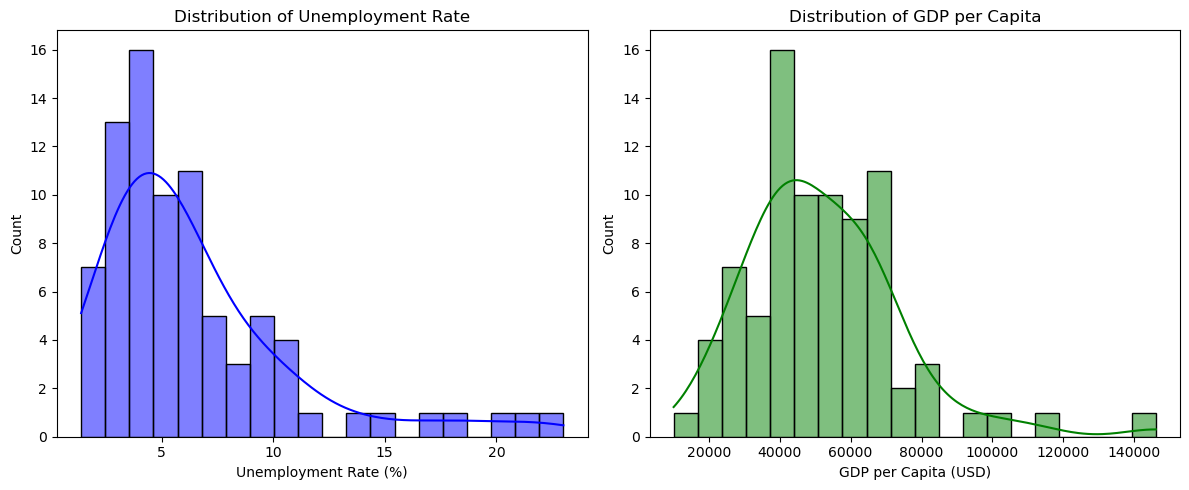

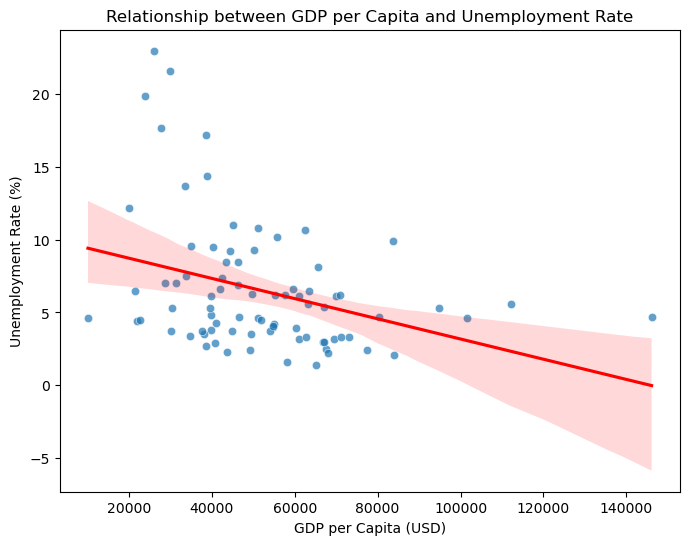

Correlation between GDP per Capita and Unemployment Rate: -0.340


In [40]:
# Replace "Unknown" and other non-numeric entries with NaN
data_new["Unemployment Rate"] = pd.to_numeric(data_new["Unemployment Rate"], errors="coerce")

# Optional: Clean GDP too, if needed
data_new["GDP per Capita"] = pd.to_numeric(data_new["GDP per Capita"], errors="coerce")

# Create a clean subset for plotting
data_clean = data_new.dropna(subset=["Unemployment Rate", "GDP per Capita"])


# Distribution plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data_clean["Unemployment Rate"], bins=20, kde=True, color="b")
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")

plt.subplot(1,2,2)
sns.histplot(data_clean["GDP per Capita"], bins=20, kde=True, color="g")
plt.title("Distribution of GDP per Capita")
plt.xlabel("GDP per Capita (USD)")

plt.tight_layout()
plt.show()

# Relationship plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_clean, x="GDP per Capita", y="Unemployment Rate", alpha=0.7)
sns.regplot(data=data_clean, x="GDP per Capita", y="Unemployment Rate", scatter=False, color="red")

plt.title("Relationship between GDP per Capita and Unemployment Rate")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Correlation
corr = data_clean["GDP per Capita"].corr(data_clean["Unemployment Rate"])
print(f"Correlation between GDP per Capita and Unemployment Rate: {corr:.3f}")


`4b)`Which are the top 5 cities with the largest difference between the Average
            Monthly Salary and Average Cost of Living? 
            What about the top 5 countries with the smallest average difference? 
            Show these results with meaningful visualizations.